# Exploring the 2020 Democratic Primary Endorsements

 First, let's import the necessary packages and define necessary constants

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import os
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

url = "https://projects.fivethirtyeight.com/endorsements-2020-data/endorsements-2020.csv"
filename = 'endorsements-2020.csv'

Defining necessary function(s)

In [5]:
def download_data(filename,url):
    '''Downloads the endorsement data from 538 to the local directory
    Inputs:
        filename - the name we want to save the csv file as
        url - the url of the csv file on 538's page
    Outputs: none
    '''
    print('Downloading up to date endorsement data')
    curl_command = 'curl -o {} {}'.format(filename,url)
    print(curl_command)
    os.system(curl_command)

Now, we decide if we're going to download the data.

In [8]:
today = datetime.datetime.today()
if os.path.exists(filename):
    statbuf = os.stat(filename)
    edit_time = datetime.datetime.fromtimestamp(statbuf.st_mtime)
    print('The file was last downloaded: {}'.format(edit_time))
    print('Would you like to download it now?')
    
    @interact
    def yes_or_no(Download = ['no','yes']):
        if Download == 'yes':
            download_data(filename,url)
else:
    download_data(filename,url)



The file was last downloaded: 2019-07-05 14:58:21.801501
Would you like to download it now?


interactive(children=(Dropdown(description='Download', options=('no', 'yes'), value='no'), Output()), _dom_cla…

Read/process the endorsement data and display endorsements from the last week.

In [9]:
endorse_df = pd.read_csv(filename)
endorse_df = endorse_df[pd.isna(endorse_df.date) == False]
dates = list(endorse_df.date)
datetimes = []
for date in dates:
    datetimes.append(datetime.datetime.strptime(date, '%Y-%m-%d'))
endorse_df['datetimes'] = datetimes
endorsees = list(endorse_df.endorsee)
points = list(endorse_df.points)

cands = dict()

start_date = datetime.datetime.strptime(dates[0], '%Y-%m-%d')
days_ago = (today - start_date).days

recent_endorsements = endorse_df[endorse_df.datetimes > (today - datetime.timedelta(days = 7))]
print(recent_endorsements[['date','endorsee','position','state','endorser','points']])

int_days = list(range(days_ago))
all_days = []
for i in int_days:
    all_days.append(start_date + datetime.timedelta(days = i))

for i,str_date in enumerate(dates):
    date = datetime.datetime.strptime(str_date, '%Y-%m-%d')
    days_after_start = (date - start_date).days
    if endorsees[i] not in cands:
        cands[endorsees[i]] = np.zeros(days_ago)
    to_add = np.zeros(days_ago)
    for j,test_date in enumerate(all_days):
        if test_date >= date:
            to_add[j] += points[i]
    cands[endorsees[i]] += to_add

the_cands = []
current_points = []

for cand in cands:
    the_cands.append(cand)
    current_points.append(cands[cand][-1])

max_points = max(current_points)


           date       endorsee        position state          endorser  points
126  2019-06-30  Kamala Harris  representative    IL     Bobby L. Rush       3
127  2019-06-30  Kamala Harris  representative    FL  Frederica Wilson       3
128  2019-07-02      Joe Biden        governor    CT        Ned Lamont       8
129  2019-07-03  Kamala Harris  representative    CT      Jahana Hayes       3


Do some plotting

c:\users\jeremy jones\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


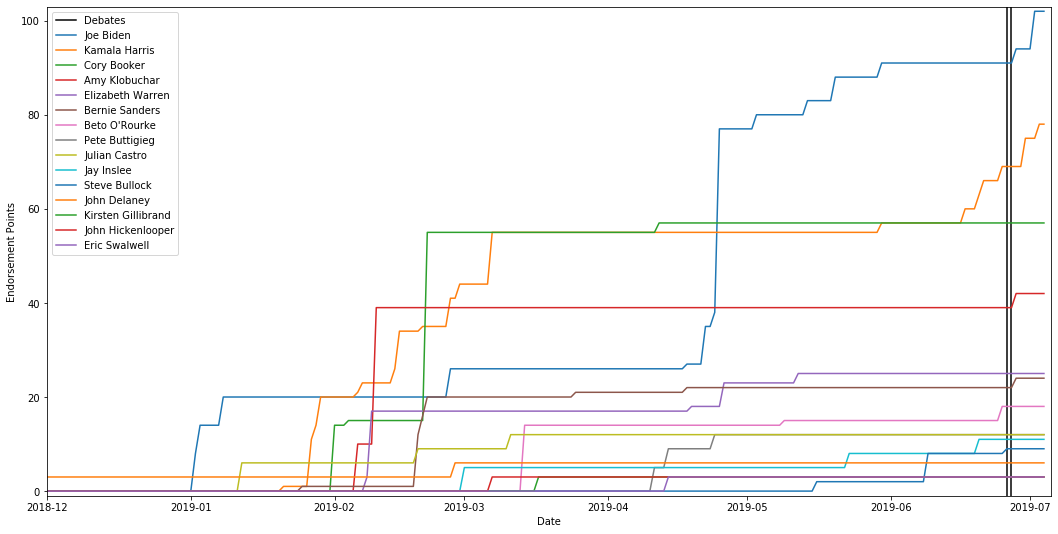

In [10]:
zipped = zip(current_points, the_cands)
zipped = sorted(zipped, reverse = True)

debate_1 = datetime.datetime.strptime('2019-06-26', '%Y-%m-%d')
debate_2 = datetime.datetime.strptime('2019-06-27', '%Y-%m-%d')

fig = plt.figure(figsize=(18,9))
plt.plot([debate_1,debate_1],[-2,max_points+2],'k-',label = 'Debates')
plt.plot([debate_2,debate_2],[-2,max_points+2],'k-')

for i in zipped:
    cand = i[1]
    plt.plot(all_days,cands[cand],label = cand)

plt.xlim(datetime.datetime.strptime('2018-12-01', '%Y-%m-%d'),today)
plt.ylim(-1,max_points+1)
plt.xlabel('Date')
plt.ylabel('Endorsement Points')
plt.legend()
plt.show()

all_states = ['AL','AK','AZ','AR','CA','CO','CT','DC','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
state_code = []
for state in all_states:
    if len(endorse_df[endorse_df.state == state]) > 0:
        state_code.append(state)

## State-by-state view of the endorsements

In [11]:
@interact
def plot_by_state(state_code = state_code):
    endorse_df = pd.read_csv(filename)
    endorse_df = endorse_df[pd.isna(endorse_df.date) == False]
    endorse_df = endorse_df[endorse_df.state == state_code]
    dates = list(endorse_df.date)
    datetimes = []
    for date in dates:
        datetimes.append(datetime.datetime.strptime(date, '%Y-%m-%d'))
    endorse_df['datetimes'] = datetimes
    endorsees = list(endorse_df.endorsee)
    points = list(endorse_df.points)

    cands = dict()

    start_date = datetime.datetime.strptime(dates[0], '%Y-%m-%d')
    days_ago = (today - start_date).days

    print(endorse_df[['date','endorsee','position','endorser','points']])

    int_days = list(range(days_ago))
    all_days = []
    for i in int_days:
        all_days.append(start_date + datetime.timedelta(days = i))

    for i,str_date in enumerate(dates):
        date = datetime.datetime.strptime(str_date, '%Y-%m-%d')
        days_after_start = (date - start_date).days
        if endorsees[i] not in cands:
            cands[endorsees[i]] = np.zeros(days_ago)
        to_add = np.zeros(days_ago)
        for j,test_date in enumerate(all_days):
            if test_date >= date:
                to_add[j] += points[i]
        cands[endorsees[i]] += to_add

    the_cands = []
    current_points = []

    for cand in cands:
        the_cands.append(cand)
        current_points.append(cands[cand][-1])

    max_points = max(current_points)

    zipped = zip(current_points, the_cands)
    zipped = sorted(zipped, reverse = True)

    debate_1 = datetime.datetime.strptime('2019-06-26', '%Y-%m-%d')
    debate_2 = datetime.datetime.strptime('2019-06-27', '%Y-%m-%d')

    fig = plt.figure(figsize=(18,9))
    plt.plot([debate_1,debate_1],[-2,max_points+2],'k-',label = 'Debates')
    plt.plot([debate_2,debate_2],[-2,max_points+2],'k-')

    for i in zipped:
        cand = i[1]
        plt.plot(all_days,cands[cand],label = cand)

    plt.xlim(datetime.datetime.strptime('2018-12-01', '%Y-%m-%d'),today)
    plt.ylim(-1,max_points+1)
    plt.xlabel('Date')
    plt.ylabel('Endorsement Points')
    plt.legend()
    plt.show()


interactive(children=(Dropdown(description='state_code', options=('AL', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'F…